**Capital One Data Challenge**

**Prince Rajvanshi**

*Import libraries*

In [1509]:
#import libraries
import pandas as pd
import numpy as np
import os
import statistics
from scipy import stats

In [1510]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

*Reusable user-defined functions*

In [1512]:
#Function to read csv files
def read_file(file_name):
  file_path = "C:\\Users\\princ\\OneDrive\\Desktop\\CapitalOneDataChallenge\\data\\" +  file_name
  return pd.read_csv(file_name, low_memory = False)

In [1513]:
#Function to replace NaN values with null - used for data cleaning
def replace_nan(df):
  for col in df.columns:
    if df[col].dtype == 'object':
      df[col] = df[col].fillna("null")
  return df

In [1514]:
#Function to downgrade datatypes from float64 to float32 and int64 to int32
#Precision beyond 7 decimal digits is not needed for this use case -  downgrading saves memory (8 bytes -> 4 bytes)
def downgrade_datatypes(df):
  for col in df.select_dtypes(include=['number']).columns:
    if df[col].dtype == np.float64:
      df[col] = df[col].astype(np.float32)
    elif df[col].dtype == np.int64:
      df[col] = df[col].astype(np.int32)
  return df

In [1515]:
#Function to impute null values with mean
#Used in data cleaning to remove null values
def impute_with_mean(df, columns_to_impute):
    for col in columns_to_impute:
        if col in df.columns:
          mean_value = df[col].mean()
          df[col] = df[col].fillna(mean_value)

In [1516]:
#Function to create a boxplot
#Used to show distribution and find outliers in input data
def build_boxplot(df, column):
    plt.figure(figsize=(4, 4))
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplots of Column: {column}')
    plt.tight_layout()
    plt.show()

In [1517]:
#Function to join two dataframes
def join_data(df1, df2, left_column, right_column):

    merged_result = df1
    merged_result = pd.merge(merged_result, df2, left_on=left_column, right_on=right_column)
    
    return merged_result

*Importing input data for all 3 files*

In [1519]:
#Read each of the 3 input files into a dataframe variable
airport_codes = read_file('Airport_Codes.csv')

flights = read_file('Flights.csv')

tickets = read_file('Tickets.csv')

*Data Cleaning/Transformation of Airport_codes data*

In [1521]:
#check columns in the airport dataset
airport_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55369 entries, 0 to 55368
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TYPE          55369 non-null  object 
 1   NAME          55369 non-null  object 
 2   ELEVATION_FT  48354 non-null  float64
 3   CONTINENT     27526 non-null  object 
 4   ISO_COUNTRY   55122 non-null  object 
 5   MUNICIPALITY  49663 non-null  object 
 6   IATA_CODE     9182 non-null   object 
 7   COORDINATES   55369 non-null  object 
dtypes: float64(1), object(7)
memory usage: 3.4+ MB


In [1522]:
#Check for null values in the dataset
airport_codes.isnull().sum()

TYPE                0
NAME                0
ELEVATION_FT     7015
CONTINENT       27843
ISO_COUNTRY       247
MUNICIPALITY     5706
IATA_CODE       46187
COORDINATES         0
dtype: int64

In [1523]:
#Filter airport codes dataset by Type to keep only the 'medium_airport' and 'large_airport' data
airport_codes = airport_codes[airport_codes['TYPE'].isin(['medium_airport', 'large_airport'])]

In [1524]:
#Filter airport dataset further to keep only the airports with ISO_Country = 'US'
airport_codes = airport_codes[airport_codes['ISO_COUNTRY'].isin(['US'])]

In [1525]:
#Check for null values in the dataset after filtering
airport_codes.isnull().sum()

TYPE              0
NAME              0
ELEVATION_FT      3
CONTINENT       858
ISO_COUNTRY       0
MUNICIPALITY      3
IATA_CODE        37
COORDINATES       0
dtype: int64

In [1526]:
#Remove columns not needed for our analysis
airport_codes = airport_codes.drop(['ELEVATION_FT','CONTINENT','ISO_COUNTRY','MUNICIPALITY','COORDINATES'], axis = 1)

In [1527]:
#show unique values in column IATA_CODE to check for any inconsistent data
airport_codes['IATA_CODE'].unique()

array(['WKK', nan, 'ABE', 'ABI', 'ABQ', 'ABR', 'ABY', 'ACK', 'ACT', 'ACV',
       'ACY', 'ADW', 'AEX', 'AFW', 'AGC', 'AGS', 'AHN', 'AKC', 'ALB',
       'ALI', 'ALM', 'ALN', 'ALO', 'ALS', 'ALW', 'AMA', 'ANB', 'AND',
       'AOO', 'APA', 'APF', 'APG', 'APN', 'ARA', 'ART', 'ASE', 'AST',
       'ATL', 'ATY', 'AUG', 'AUS', 'AUW', 'AVL', 'AVP', 'AXN', 'AZO',
       'BAB', 'BAD', 'BAF', 'CLU', 'BBD', 'BCE', 'BDE', 'BDL', 'BDR',
       'BED', 'BFD', 'BFF', 'BFI', 'BFL', 'BFM', 'BGM', 'BGR', 'BHB',
       'BHM', 'BIF', 'BIH', 'BIL', 'BIS', 'BIX', 'BJC', 'BJI', 'BKE',
       'BFK', 'BKL', 'BKW', 'BLF', 'BLH', 'BLI', 'BLV', 'BMG', 'BMI',
       'BNA', 'BNO', 'BOI', 'BOS', 'BPI', 'WMH', 'BPT', 'BQK', 'BRD',
       'BRL', 'BRO', 'BTL', 'BTM', 'BTR', 'BTV', 'BUF', 'BUR', 'BFP',
       'BVY', 'BWG', 'BWI', 'BYH', 'BYI', 'BYS', 'BZN', 'CAE', 'CAK',
       'CAR', 'CBM', 'CCY', 'CDC', 'CDR', 'CDS', 'CEC', 'CEF', 'CEW',
       'CGF', 'CGI', 'CHA', 'CHO', 'CHS', 'CID', 'CIU', 'CKB', 'CLE',
       'CLL', '

In [1528]:
#Run the user defined functions created above to downgrade datatypes and replace NaN values
airport_codes = downgrade_datatypes(airport_codes)
airport_codes = replace_nan(airport_codes)
airport_codes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 858 entries, 6194 to 50008
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TYPE       858 non-null    object
 1   NAME       858 non-null    object
 2   IATA_CODE  858 non-null    object
dtypes: object(3)
memory usage: 26.8+ KB


In [1529]:
#check number of duplicate rows
airport_codes.duplicated().sum()

0

In [1530]:
#check for duplicate rows in the airport codes dataset
duplicate_airport_codes = airport_codes.duplicated()
duplicate_airport_codes.unique()

array([False])

In [1531]:
#Remove duplicates from the airport_codes dataset, if any
airport_codes = airport_codes.drop_duplicates()

In [1532]:
#Reset index to account for the removal of filtered/duplicate data
airport_codes = airport_codes.reset_index(drop=True)

In [1533]:
#Check for any null values in the columns
airport_codes.isnull().sum()

TYPE         0
NAME         0
IATA_CODE    0
dtype: int64

*Data Cleaning/Transformation of Flights data*

In [1535]:
#check columns in the flight data set
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915886 entries, 0 to 1915885
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   FL_DATE            object 
 1   OP_CARRIER         object 
 2   TAIL_NUM           object 
 3   OP_CARRIER_FL_NUM  object 
 4   ORIGIN_AIRPORT_ID  int64  
 5   ORIGIN             object 
 6   ORIGIN_CITY_NAME   object 
 7   DEST_AIRPORT_ID    int64  
 8   DESTINATION        object 
 9   DEST_CITY_NAME     object 
 10  DEP_DELAY          float64
 11  ARR_DELAY          float64
 12  CANCELLED          float64
 13  AIR_TIME           object 
 14  DISTANCE           object 
 15  OCCUPANCY_RATE     float64
dtypes: float64(4), int64(2), object(10)
memory usage: 233.9+ MB


In [1536]:
#Notice how the AIR_TIME and DISTANCE columns are not numeric, so we change them to numeric type
for col in ["AIR_TIME", "DISTANCE"]:
  flights[col] = pd.to_numeric(flights[col], errors='coerce')

In [1537]:
#Filter flights dataset to keep only the flights which were not cancelled using the column CANCELLED = 0
flights = flights[flights['CANCELLED'] == 0]

In [1538]:
#Check for any null values in the columns
flights.isnull().sum()

FL_DATE                 0
OP_CARRIER              0
TAIL_NUM                0
OP_CARRIER_FL_NUM       0
ORIGIN_AIRPORT_ID       0
ORIGIN                  0
ORIGIN_CITY_NAME        0
DEST_AIRPORT_ID         0
DESTINATION             0
DEST_CITY_NAME          0
DEP_DELAY               0
ARR_DELAY            4377
CANCELLED               0
AIR_TIME             6857
DISTANCE             2680
OCCUPANCY_RATE        310
dtype: int64

In [1539]:
#check for duplicate rows in the flights dataset
duplicate_flights = flights.duplicated()
duplicate_flights.unique()

array([False,  True])

In [1540]:
#check number of duplicate rows
flights.duplicated().sum()

4410

In [1541]:
#Remove duplicates from the flights dataset
flights = flights.drop_duplicates()

In [1542]:
#Check for any null values in the columns
flights.isnull().sum()

FL_DATE                 0
OP_CARRIER              0
TAIL_NUM                0
OP_CARRIER_FL_NUM       0
ORIGIN_AIRPORT_ID       0
ORIGIN                  0
ORIGIN_CITY_NAME        0
DEST_AIRPORT_ID         0
DESTINATION             0
DEST_CITY_NAME          0
DEP_DELAY               0
ARR_DELAY            4368
CANCELLED               0
AIR_TIME             4616
DISTANCE              268
OCCUPANCY_RATE         31
dtype: int64

In [1543]:
#Run the user defined functions created above to downgrade datatypes and replace NaN values
flights = downgrade_datatypes(flights)

In [1544]:
#Check for any null values in the columns
flights.isnull().sum()

FL_DATE                 0
OP_CARRIER              0
TAIL_NUM                0
OP_CARRIER_FL_NUM       0
ORIGIN_AIRPORT_ID       0
ORIGIN                  0
ORIGIN_CITY_NAME        0
DEST_AIRPORT_ID         0
DESTINATION             0
DEST_CITY_NAME          0
DEP_DELAY               0
ARR_DELAY            4368
CANCELLED               0
AIR_TIME             4616
DISTANCE              268
OCCUPANCY_RATE         31
dtype: int64

In [1545]:
#Reset index to account for the removal of filtered data/duplicate data
flights = flights.reset_index(drop=True)

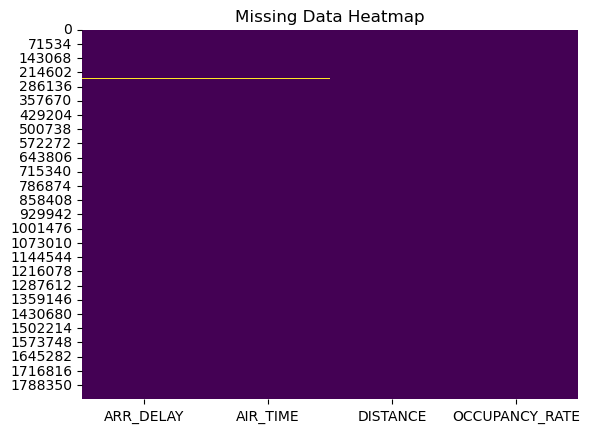

In [1546]:
#Create a heatmap chart to see where the null values in the data set are occuring
import seaborn as sns
import matplotlib.pyplot as plt

missing_values = flights.columns[flights.isnull().any()]
flights_missing = flights[missing_values]
sns.heatmap(flights_missing.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

#Based on the plot, there is a correlation between missing data of columns ARR_DELAY and AIR_TIME;
#if ARR_DELAY is null, AIR_TIME is null and vice versa

In [1547]:
#Check for any null values in the columns
flights.isnull().sum()

FL_DATE                 0
OP_CARRIER              0
TAIL_NUM                0
OP_CARRIER_FL_NUM       0
ORIGIN_AIRPORT_ID       0
ORIGIN                  0
ORIGIN_CITY_NAME        0
DEST_AIRPORT_ID         0
DESTINATION             0
DEST_CITY_NAME          0
DEP_DELAY               0
ARR_DELAY            4368
CANCELLED               0
AIR_TIME             4616
DISTANCE              268
OCCUPANCY_RATE         31
dtype: int64

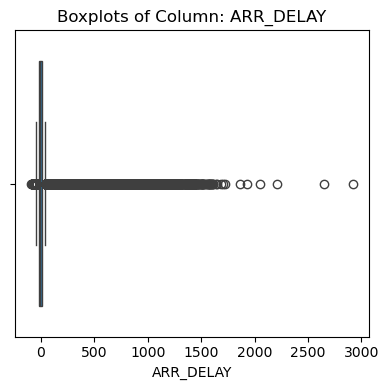

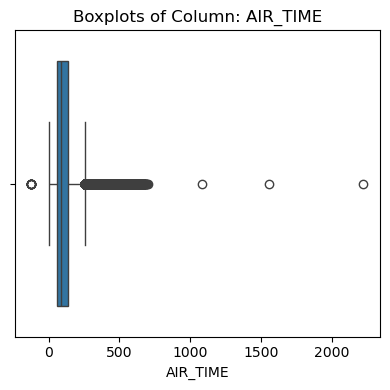

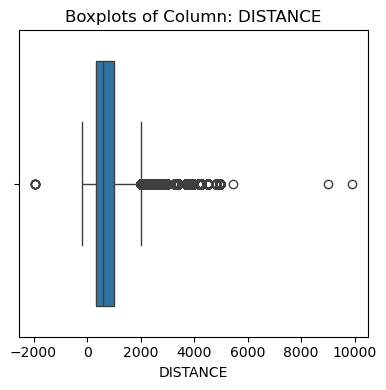

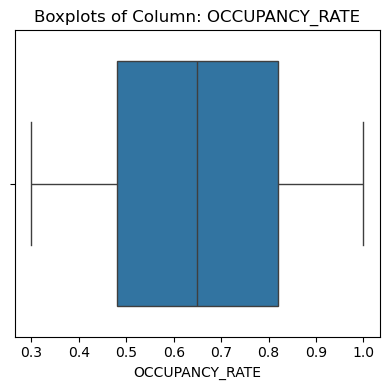

In [1548]:
#Create boxplots for each of the 4 columns which contain null values to check for distribution of data and any outliers
build_boxplot(flights, 'ARR_DELAY')
build_boxplot(flights, 'AIR_TIME')
build_boxplot(flights, 'DISTANCE')
build_boxplot(flights, 'OCCUPANCY_RATE')

In [1549]:
#impute null values with mean for the respective columns
columns_to_impute = ['ARR_DELAY', 'AIR_TIME', 'DISTANCE']
impute_with_mean(flights,columns_to_impute)

In [1550]:
#Create a new column called ROUTE to track for a trip
flights['ROUTE'] = flights['ORIGIN'] + ' - ' + flights['DESTINATION']

*Data Cleaning/Transformation of Tickets data*

In [1552]:
#Check columns in the tickets data set
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167285 entries, 0 to 1167284
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   ITIN_ID            1167285 non-null  int64  
 1   YEAR               1167285 non-null  int64  
 2   QUARTER            1167285 non-null  int64  
 3   ORIGIN             1167285 non-null  object 
 4   ORIGIN_COUNTRY     1167285 non-null  object 
 5   ORIGIN_STATE_ABR   1167285 non-null  object 
 6   ORIGIN_STATE_NM    1167285 non-null  object 
 7   ROUNDTRIP          1167285 non-null  float64
 8   REPORTING_CARRIER  1167285 non-null  object 
 9   PASSENGERS         1165308 non-null  float64
 10  ITIN_FARE          1166325 non-null  object 
 11  DESTINATION        1167285 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 106.9+ MB


In [1553]:
#Filter tickets dataset to keep only the roundtrip tickets using the condition roundtrip = 1
tickets = tickets[tickets['ROUNDTRIP'] == 1]

In [1554]:
#column ITIN_FARE is type object, update to type number since fare will be a numeric value
tickets['ITIN_FARE'] = pd.to_numeric(tickets['ITIN_FARE'], errors='coerce')

In [1555]:
#Run the user defined functions created above to downgrade datatypes
tickets = downgrade_datatypes(tickets)
#tickets = replace_nan(tickets)
tickets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 708600 entries, 0 to 1167284
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ITIN_ID            708600 non-null  int32  
 1   YEAR               708600 non-null  int32  
 2   QUARTER            708600 non-null  int32  
 3   ORIGIN             708600 non-null  object 
 4   ORIGIN_COUNTRY     708600 non-null  object 
 5   ORIGIN_STATE_ABR   708600 non-null  object 
 6   ORIGIN_STATE_NM    708600 non-null  object 
 7   ROUNDTRIP          708600 non-null  float32
 8   REPORTING_CARRIER  708600 non-null  object 
 9   PASSENGERS         707403 non-null  float32
 10  ITIN_FARE          706750 non-null  float32
 11  DESTINATION        708600 non-null  object 
dtypes: float32(3), int32(3), object(6)
memory usage: 54.1+ MB


In [1556]:
#check for duplicate rows in the tickets dataset
duplicate_tickets = tickets.duplicated()
duplicate_tickets.unique()

array([False,  True])

In [1557]:
#check number of duplicate rows
tickets.duplicated().sum()

47564

In [1558]:
#Remove duplicates from the tickets dataset
tickets = tickets.drop_duplicates()

In [1559]:
#Check for any null values in the columns
tickets.isnull().sum()

ITIN_ID                 0
YEAR                    0
QUARTER                 0
ORIGIN                  0
ORIGIN_COUNTRY          0
ORIGIN_STATE_ABR        0
ORIGIN_STATE_NM         0
ROUNDTRIP               0
REPORTING_CARRIER       0
PASSENGERS            960
ITIN_FARE            1657
DESTINATION             0
dtype: int64

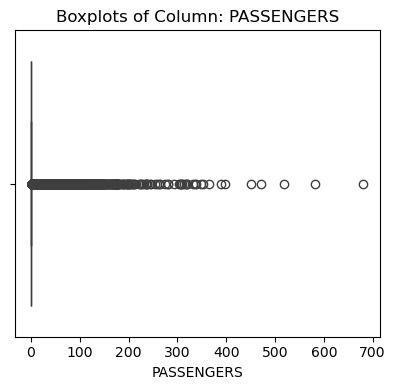

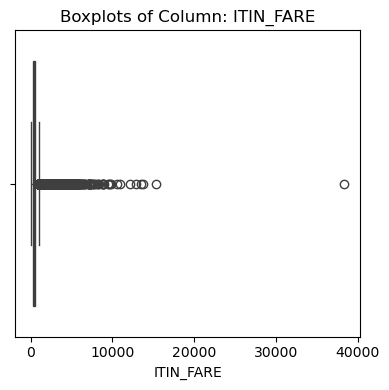

In [1560]:
#Create boxplots for both columns which contain null values to check for distribution of data and any outliers
build_boxplot(tickets, 'PASSENGERS')
build_boxplot(tickets, 'ITIN_FARE')

In [1561]:
#impute null values with mean for the respective column
columns_to_impute = ['PASSENGERS', 'ITIN_FARE']
impute_with_mean(tickets,columns_to_impute)

In [1562]:
#Check for any null values in the columns after imputation
tickets.isnull().sum()

ITIN_ID              0
YEAR                 0
QUARTER              0
ORIGIN               0
ORIGIN_COUNTRY       0
ORIGIN_STATE_ABR     0
ORIGIN_STATE_NM      0
ROUNDTRIP            0
REPORTING_CARRIER    0
PASSENGERS           0
ITIN_FARE            0
DESTINATION          0
dtype: int64

In [1563]:
#Create a new column called ROUTE to track for each ticket
tickets['ROUTE'] = tickets['ORIGIN'] + ' - ' + tickets['DESTINATION']

In [1564]:
#Remove columns not needed for our analysis
tickets = tickets.drop(['ITIN_ID','ORIGIN_COUNTRY','ORIGIN_STATE_ABR','ORIGIN_STATE_NM', 'ROUNDTRIP', 'REPORTING_CARRIER'], axis = 1)

In [1565]:
#Group the ticket set by ROUTE column taking the sum of passengers and average of ITIN_FARE
#Assumption - ITIN_FARE is the single person's fare and not the total fare for all passengers
tickets = tickets.groupby(['ORIGIN', 'DESTINATION', 'ROUTE']).agg(
    total_passengers=('PASSENGERS', 'sum'), 
    avg_fare=('ITIN_FARE', lambda x: round(x.mean(), 2))
).reset_index()

In [1566]:
tickets.head()

,ORIGIN,DESTINATION,ROUTE,total_passengers,avg_fare
0,ABE,ABQ,ABE - ABQ,2.0,534.000000
1,ABE,AGS,ABE - AGS,1.0,299.000000
2,ABE,AMA,ABE - AMA,1.0,654.000000
3,ABE,ASE,ABE - ASE,2.0,742.000000
4,ABE,ATL,ABE - ATL,56.0,506.269989


**Question 1: The 10 busiest round trip routes in terms of number of round trip flights in the quarter. Exclude canceled flights when performing the calculation.**

In [1568]:
flights.head()

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE,ROUTE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.97,RSW - CLE
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.55,RSW - CMH
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.91,RSW - CMH
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.67,RSW - CMH
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.62,RSW - DAL


In [1569]:
#Create a new column called "NORMALIZED_ROUTE" which creates a new column based on ORIGIN and DESTINATION columns
#The NORMALIZED_ROUTE column would be same where there for 2 sets where ORIGIN = DESTINATION and DESTINATION = ORIGIN
#e.g. EWR - SFO and SFO - EWR  would have the same NORMALIZED_ROUTE of EWR - SFO
flights["NORMALIZED_ROUTE"] = flights.apply(
    lambda x: " - ".join(sorted([x["ORIGIN"], x["DESTINATION"]])), axis=1
)

In [1570]:
#Count the occurrences of each route as they appear in the ROUTE and NORMALIZED_ROUTE columns
#Take the lower of both values to count the total number of round trips for a route
#e.g. if route EWR - SFO has 120 flights and SFO - EWR has 130 flights, round trip FLIGHT_COUNT would show 120
busiest_routes = flights.groupby(['ROUTE', 'NORMALIZED_ROUTE']).size().reset_index(name='FLIGHT_COUNT')

busiest_routes.columns = ['ROUTE', 'NORMALIZED_ROUTE', 'FLIGHT_COUNT']
print(busiest_routes.sort_values(by = 'FLIGHT_COUNT', ascending = False))

busiest_routes = (busiest_routes.groupby('NORMALIZED_ROUTE')['FLIGHT_COUNT'].min().reset_index().sort_values(by='FLIGHT_COUNT', ascending=False))
print(busiest_routes)


          ROUTE NORMALIZED_ROUTE  FLIGHT_COUNT
5284  SFO - LAX        LAX - SFO          4176
3010  LAX - SFO        LAX - SFO          4164
4066  ORD - LGA        LGA - ORD          3580
3115  LGA - ORD        LGA - ORD          3576
2971  LAX - LAS        LAS - LAX          3257
...         ...              ...           ...
4212  PBI - MSP        MSP - PBI             1
4176  PAE - DEN        DEN - PAE             1
3551  MKE - ESC        ESC - MKE             1
3622  MSN - LAX        LAX - MSN             1
4037  ORD - FAT        FAT - ORD             1

[5917 rows x 3 columns]
     NORMALIZED_ROUTE  FLIGHT_COUNT
2255        LAX - SFO          4164
2299        LGA - ORD          3576
2158        LAS - LAX          3254
2099        JFK - LAX          3158
2254        LAX - SEA          2497
...               ...           ...
2243        LAX - PSC             1
101         APN - CLE             1
2296        LGA - MTJ             1
103         APN - MBS             1
155         ATL

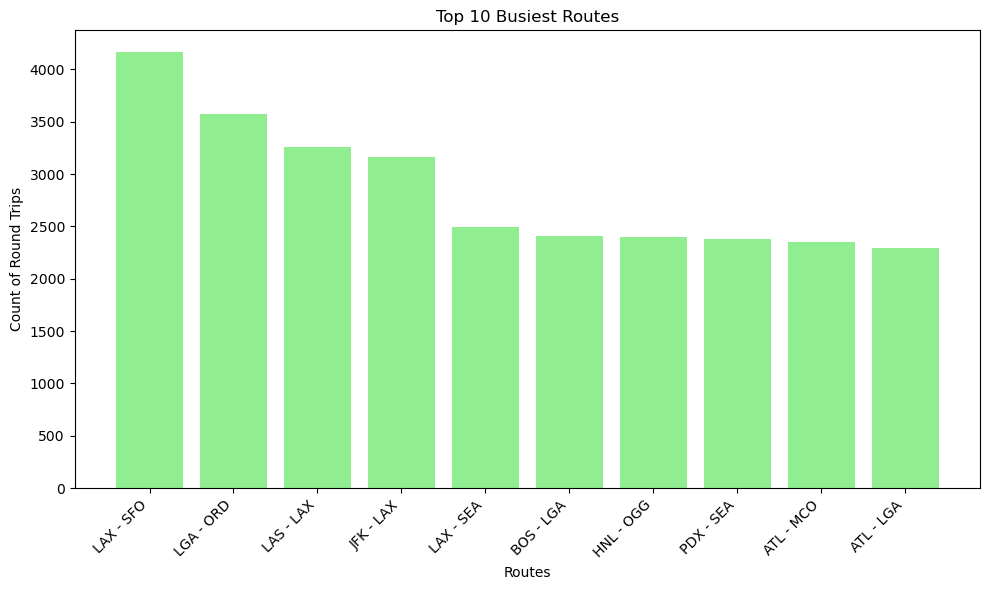

In [1571]:
#create chart to show top 10 routes by round trips
busiest_routes = busiest_routes.sort_values(by="FLIGHT_COUNT", ascending=False).head(10)

# Plotting the top 10 round trips
plt.figure(figsize=(10, 6))
plt.bar(busiest_routes["NORMALIZED_ROUTE"], busiest_routes["FLIGHT_COUNT"], color='lightgreen')
plt.xlabel("Routes")
plt.ylabel("Count of Round Trips")
plt.title("Top 10 Busiest Routes")
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

**Question 2: The 10 most profitable round trip routes (without considering the upfront airplane cost) in  the quarter. Along with the profit, show total revenue, total cost, summary values of other key components and total round trip flights in the quarter for the top 10 most profitable routes. Exclude canceled flights from these calculations.**

In [1573]:
#Merge with airport codes data set to get origin airport details using the reusable function "join_data"
#New variable "profitable_routes" is created to store the merged data from all 3 sets
profitable_routes = join_data(flights, airport_codes, left_column='ORIGIN', right_column='IATA_CODE')
profitable_routes.drop(columns=['NAME', 'IATA_CODE'], inplace=True)
profitable_routes.rename(columns={'TYPE': 'ORIGIN_TYPE'}, inplace=True)

#Merge with airport codes data set to get destination airport details
profitable_routes = join_data(profitable_routes, airport_codes, left_column='DESTINATION', right_column='IATA_CODE')
profitable_routes.drop(columns=['NAME', 'IATA_CODE'], inplace=True)
profitable_routes.rename(columns={'TYPE': 'DESTINATION_TYPE'}, inplace=True)

#Merge with tickets data set to get the average price per ticket by route
profitable_routes = join_data(profitable_routes, tickets, left_column='ROUTE', right_column='ROUTE')
profitable_routes.drop(columns=['ORIGIN_y', 'DESTINATION_y', 'total_passengers'], inplace=True)

In [1574]:
#Create new columns to calculate different costs and revenues associated with each flight
profitable_routes['MAINTENANCE_COSTS'] = profitable_routes['DISTANCE']*(8+1.18)
profitable_routes['OPERATIONAL_COSTS'] = profitable_routes['ORIGIN_TYPE'].apply(lambda x: 5000 if x == 'medium_airport' else 10000) + profitable_routes['DESTINATION_TYPE'].apply(lambda x: 5000 if x == 'medium_airport' else 10000)
profitable_routes['DELAY_COST'] = profitable_routes['ARR_DELAY'].apply(lambda x: 75*(x-15) if x > 15 else 0) + profitable_routes['DEP_DELAY'].apply(lambda x: 75*(x-15) if x > 15 else 0)
profitable_routes['PASSENGERS'] = profitable_routes['OCCUPANCY_RATE']*200
profitable_routes['TOTAL_FARE'] = profitable_routes['avg_fare']*profitable_routes['PASSENGERS']
profitable_routes['BAGGAGE_FEE'] = profitable_routes['PASSENGERS']*0.5*70
profitable_routes['TOTAL_REVENUE'] = profitable_routes['TOTAL_FARE'] + profitable_routes['BAGGAGE_FEE']
profitable_routes['TOTAL_COST'] = profitable_routes['MAINTENANCE_COSTS'] + profitable_routes['OPERATIONAL_COSTS'] + profitable_routes['DELAY_COST']
profitable_routes['PROFIT'] = profitable_routes['TOTAL_REVENUE'] - profitable_routes['TOTAL_COST']

In [1575]:
profitable_routes.head()

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_x,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION_x,DEST_CITY_NAME,...,avg_fare,MAINTENANCE_COSTS,OPERATIONAL_COSTS,DELAY_COST,PASSENGERS,TOTAL_FARE,BAGGAGE_FEE,TOTAL_REVENUE,TOTAL_COST,PROFIT
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",...,239.289993,9409.5,20000,0.0,194.0,46422.257812,6790.0,53212.257812,29409.5,23802.757812
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",...,262.829987,8537.4,20000,0.0,110.0,28911.298828,3850.0,32761.298828,28537.4,4223.898828
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",...,262.829987,8537.4,20000,0.0,182.0,47835.058594,6370.0,54205.058594,28537.4,25667.658594
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",...,262.829987,8537.4,20000,0.0,134.0,35219.218750,4690.0,39909.218750,28537.4,11371.818750
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",...,405.549988,9225.9,20000,0.0,124.0,50288.199219,4340.0,54628.199219,29225.9,25402.299219


In [1576]:
#Check mean fare for all flights
print(profitable_routes['avg_fare'].mean())

434.01776


In [1577]:
#Noticed the average fare was quite high for some tickets randomly
#We will get rid of these outlier fares since it is skewing the data and giving incorrect result
#Calculate Z-scores
#Z-score is a measurement that describes how many standard deviations away is a data point from the mean
z_scores = np.abs(stats.zscore(profitable_routes['avg_fare']))

# Remove rows where the Z-score is greater than 3. 
#If the score is 3x more than mean, we will remove it as it is most likely an anamoly caused by manual error or holiday pricing
profitable_routes = profitable_routes[z_scores < 3]

In [1578]:
#Group the route data based on the "NORMALIZED_ROUTE" column and calculate aggregated cost and revenue columns
profitable_routes = profitable_routes.groupby('NORMALIZED_ROUTE').agg({
    'MAINTENANCE_COSTS': 'sum',  
    'OPERATIONAL_COSTS': 'sum',  
    'DELAY_COST': 'sum',  
    'TOTAL_FARE': 'sum',     
    'BAGGAGE_FEE': 'sum',  
    'TOTAL_REVENUE': 'sum',
    'TOTAL_COST': 'sum',
    'PROFIT': ['sum', 'mean'],
    'OCCUPANCY_RATE': 'mean',
    'ARR_DELAY': 'mean',
    'DEP_DELAY': 'mean'
}).reset_index()

profitable_routes.columns = [
    'NORMALIZED_ROUTE',
    'MAINTENANCE_COSTS',
    'OPERATIONAL_COSTS',
    'DELAY_COST',
    'TOTAL_FARE',
    'BAGGAGE_FEE',
    'TOTAL_REVENUE',
    'TOTAL_COST',
    'PROFIT_SUM',         
    'PROFIT_MEAN',        
    'OCCUPANCY_RATE',
    'ARR_DELAY',
    'DEP_DELAY'
]

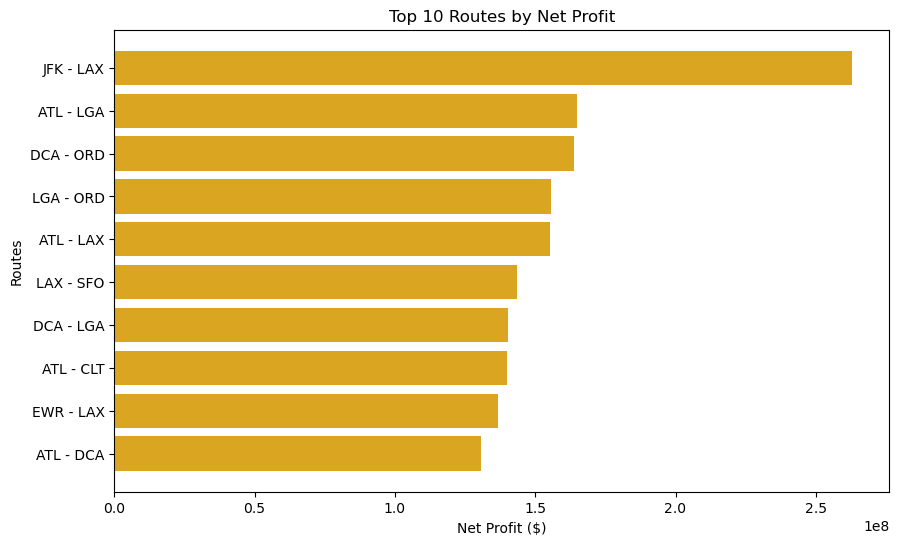

In [1579]:
#Plot chart based on top 10 routes by profit
#Create new "top_10_profitable_routes" variable to store the top 10 routes which have the most profit sorted by PROFIT_SUM column
top_10_profitable_routes = profitable_routes.sort_values(by="PROFIT_SUM", ascending=False).head(10)

# Plotting the top 10 round trips
plt.figure(figsize=(10, 6))
plt.barh(top_10_profitable_routes['NORMALIZED_ROUTE'], top_10_profitable_routes['PROFIT_SUM'], color='goldenrod')
plt.xlabel("Net Profit ($)")
plt.ylabel("Routes")
plt.title("Top 10 Routes by Net Profit")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

**Question 3:  The 5 round trip routes that you recommend to invest in based on any factors that you choose.**

In [1581]:
flights.head()

,FL_DATE,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,DESTINATION,DEST_CITY_NAME,DEP_DELAY,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE,OCCUPANCY_RATE,ROUTE,NORMALIZED_ROUTE
0,2019-03-02,WN,N955WN,4591,14635,RSW,"Fort Myers, FL",11042,CLE,"Cleveland, OH",-8.0,-6.0,0.0,143.0,1025.0,0.97,RSW - CLE,CLE - RSW
1,2019-03-02,WN,N8686A,3231,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",1.0,5.0,0.0,135.0,930.0,0.55,RSW - CMH,CMH - RSW
2,2019-03-02,WN,N201LV,3383,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",0.0,4.0,0.0,132.0,930.0,0.91,RSW - CMH,CMH - RSW
3,2019-03-02,WN,N413WN,5498,14635,RSW,"Fort Myers, FL",11066,CMH,"Columbus, OH",11.0,14.0,0.0,136.0,930.0,0.67,RSW - CMH,CMH - RSW
4,2019-03-02,WN,N7832A,6933,14635,RSW,"Fort Myers, FL",11259,DAL,"Dallas, TX",0.0,-17.0,0.0,151.0,1005.0,0.62,RSW - DAL,DAL - RSW


In [1582]:
#Top 5 recommended trips is based on the colummn "PROFIT_MEAN" 
#The "PROFIT_MEAN" column gives us the net profit per flight on each "NORMALIZED_ROUTE"
profitable_routes.sort_values(by="PROFIT_MEAN", ascending=False).head(10)

,NORMALIZED_ROUTE,MAINTENANCE_COSTS,OPERATIONAL_COSTS,DELAY_COST,TOTAL_FARE,BAGGAGE_FEE,TOTAL_REVENUE,TOTAL_COST,PROFIT_SUM,PROFIT_MEAN,OCCUPANCY_RATE,ARR_DELAY,DEP_DELAY
2287,MDT - PHL,306905.76,5970000,443625.0,46724416.0,1.799070e+06,4.852349e+07,6.720531e+06,4.180296e+07,105032.555920,0.645754,4.756281,6.045226
45,ADK - ANC,503357.76,690000,32925.0,5270137.0,2.126600e+05,5.482797e+06,1.226283e+06,4.256514e+06,92532.923008,0.660435,-12.543478,-0.543478
1247,DEN - SUN,746535.96,2190000,149475.0,15780353.0,6.714400e+05,1.645179e+07,3.086011e+06,1.336578e+07,91546.451102,0.656986,0.779497,7.191781
1477,EGE - JFK,1041838.20,975000,120075.0,7718944.0,3.098200e+05,8.028764e+06,2.136913e+06,5.891851e+06,90643.858089,0.680923,24.056311,5.830769
1197,DEN - MOT,1874115.36,5070000,904125.0,34509444.0,1.552670e+06,3.606211e+07,7.848240e+06,2.821387e+07,83472.999054,0.656243,17.460533,16.411243
1981,JFK - LAX,71842221.00,63240000,4797525.0,388450016.0,1.446018e+07,4.029102e+08,1.398797e+08,2.630304e+08,83184.830595,0.653302,-3.689443,12.077482
1960,JAC - JFK,452059.92,390000,27825.0,2839824.0,1.312500e+05,2.971074e+06,8.698849e+05,2.101189e+06,80814.964926,0.721154,-10.461538,6.730769
1954,ISP - PHL,395015.40,4965000,343800.0,30861440.0,1.489810e+06,3.235125e+07,5.703815e+06,2.664743e+07,80505.844750,0.642991,4.969789,4.957704
833,CLT - GSP,1065109.50,30940000,1547025.0,149999296.0,7.034300e+06,1.570336e+08,3.355213e+07,1.234815e+08,79819.947377,0.649580,-0.063995,7.051713
102,ASE - IAH,4207432.68,7530000,1699425.0,50336644.0,2.251550e+06,5.258820e+07,1.343686e+07,3.915134e+07,77990.711828,0.640737,22.093956,24.300797


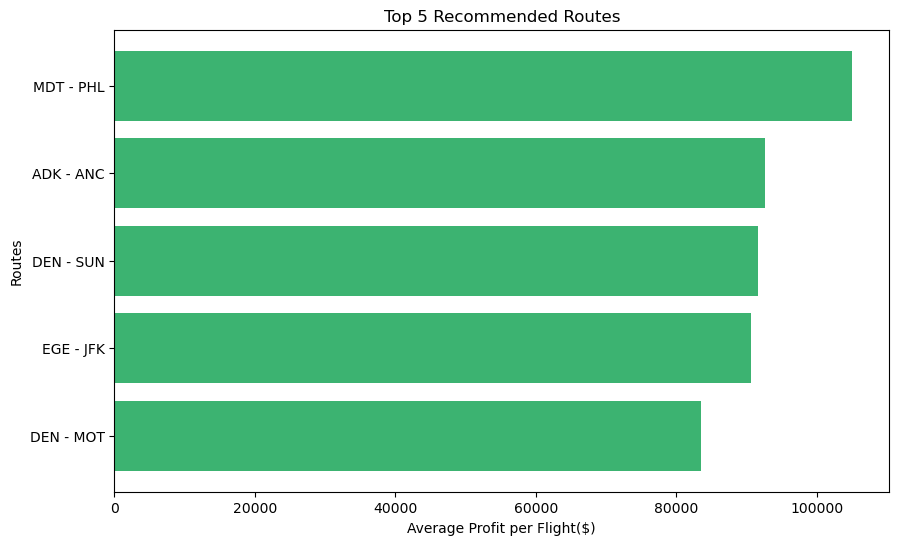

In [1583]:
#Create new "top_5_recommended_routes" variable to store the top 5 routes which have the most profit per flight sorted by PROFIT_MEAN column
profitable_routes = profitable_routes.sort_values(by="PROFIT_MEAN", ascending=False).head(5)

# Plotting the top_5_recommended_routes
plt.figure(figsize=(10, 6))
plt.barh(profitable_routes['NORMALIZED_ROUTE'], profitable_routes['PROFIT_MEAN'], color='mediumseagreen')
plt.xlabel("Average Profit per Flight($)")
plt.ylabel("Routes")
plt.title("Top 5 Recommended Routes")
plt.gca().invert_yaxis()  
plt.show()

**Question 4:   The number of round trip flights it will take to breakeven on the upfront airplane cost for each of the 5 round trip routes that you recommend. Print key summary components for  these routes.**

In [1585]:
profitable_routes.head()

,NORMALIZED_ROUTE,MAINTENANCE_COSTS,OPERATIONAL_COSTS,DELAY_COST,TOTAL_FARE,BAGGAGE_FEE,TOTAL_REVENUE,TOTAL_COST,PROFIT_SUM,PROFIT_MEAN,OCCUPANCY_RATE,ARR_DELAY,DEP_DELAY
2287,MDT - PHL,306905.76,5970000,443625.0,46724416.0,1.799070e+06,4.852349e+07,6720530.76,4.180296e+07,105032.555920,0.645754,4.756281,6.045226
45,ADK - ANC,503357.76,690000,32925.0,5270137.0,2.126600e+05,5.482797e+06,1226282.76,4.256514e+06,92532.923008,0.660435,-12.543478,-0.543478
1247,DEN - SUN,746535.96,2190000,149475.0,15780353.0,6.714400e+05,1.645179e+07,3086010.96,1.336578e+07,91546.451102,0.656986,0.779497,7.191781
1477,EGE - JFK,1041838.20,975000,120075.0,7718944.0,3.098200e+05,8.028764e+06,2136913.20,5.891851e+06,90643.858089,0.680923,24.056311,5.830769
1197,DEN - MOT,1874115.36,5070000,904125.0,34509444.0,1.552670e+06,3.606211e+07,7848240.36,2.821387e+07,83472.999054,0.656243,17.460533,16.411243


In [1586]:
#New column "flights_breakeven" is created to calculate the number of flights needed to break even based on "PROFIT_MEAN"
#Cost of new plane = $90,000,000
profitable_routes['flights_breakeven'] = 90000000/profitable_routes['PROFIT_MEAN']

In [1587]:
profitable_routes.sort_values(by="PROFIT_MEAN", ascending=False).head(10)

,NORMALIZED_ROUTE,MAINTENANCE_COSTS,OPERATIONAL_COSTS,DELAY_COST,TOTAL_FARE,BAGGAGE_FEE,TOTAL_REVENUE,TOTAL_COST,PROFIT_SUM,PROFIT_MEAN,OCCUPANCY_RATE,ARR_DELAY,DEP_DELAY,flights_breakeven
2287,MDT - PHL,306905.76,5970000,443625.0,46724416.0,1.799070e+06,4.852349e+07,6720530.76,4.180296e+07,105032.555920,0.645754,4.756281,6.045226,856.877177
45,ADK - ANC,503357.76,690000,32925.0,5270137.0,2.126600e+05,5.482797e+06,1226282.76,4.256514e+06,92532.923008,0.660435,-12.543478,-0.543478,972.626791
1247,DEN - SUN,746535.96,2190000,149475.0,15780353.0,6.714400e+05,1.645179e+07,3086010.96,1.336578e+07,91546.451102,0.656986,0.779497,7.191781,983.107471
1477,EGE - JFK,1041838.20,975000,120075.0,7718944.0,3.098200e+05,8.028764e+06,2136913.20,5.891851e+06,90643.858089,0.680923,24.056311,5.830769,992.896837
1197,DEN - MOT,1874115.36,5070000,904125.0,34509444.0,1.552670e+06,3.606211e+07,7848240.36,2.821387e+07,83472.999054,0.656243,17.460533,16.411243,1078.192961


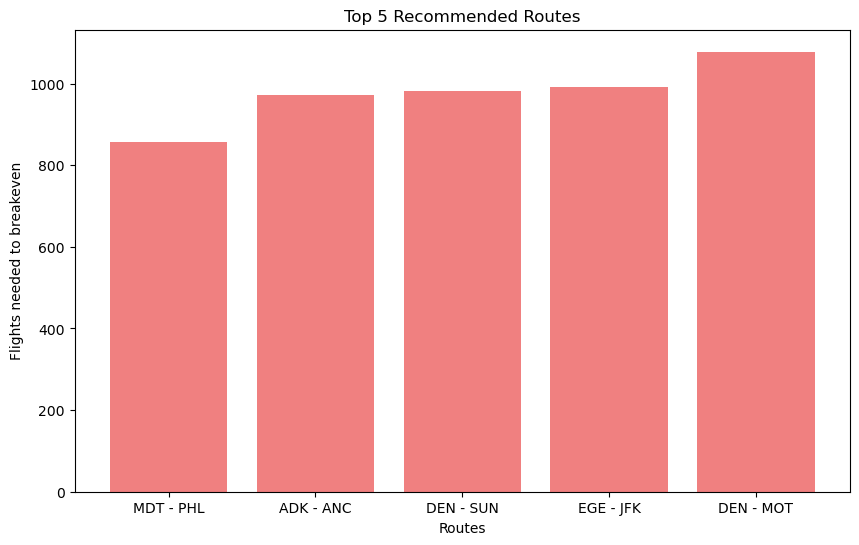

In [1588]:
#Create new "top_5_breakeven" variable to store the top 5 routes which would need the least flights to break even
#profitable_routes = profitable_routes.sort_values(by="PROFIT_MEAN", ascending=False).head(5)


# Plotting the top 10 round trips
plt.figure(figsize=(10, 6))
plt.bar(profitable_routes['NORMALIZED_ROUTE'], profitable_routes['flights_breakeven'], color='lightcoral')
plt.xlabel("Routes")
plt.ylabel("Flights needed to breakeven")
plt.title("Top 5 Recommended Routes")
#plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

**Question 5:   Key Performance Indicators (KPI’s) that you recommend tracking in the future to measure the success of the round trip routes that you recommend.**

Based on the analysis and data points mentioned in the input data sets, I would recommend the following KPIs to track in the future:

    - Passenger demand & occupancy rate - seasonal trends might lead to fluctuations (e.g. aurora viewing during winters in Alaska, ski season in Denver).
    - On time performance - the company prides itself for being on time, so this is one of the most critical parameters.
    - Customer feedback
    - Revenue per passenger
    - Competitor activity - track new routes from competitors to stay ahead of the competition
    - Cancellation Rate per Route